### Ploting terrain using pygmt
In Geoscinece, visualization of DEM or topography is very common. This tutorial demonstrates how to plot simple earth terrain using beautiful color map

* GMT comes with Earth relief model that can be accessed using special file names like "@earth_relied_xxx"

* We'll also add a colorbar for good measure. The position is set to be outside the map frame (J), at the Middle Right (MR) side. The colorbar will automatically pick up the last colormap we used above, but we can force the units to be in kilometres instead of the default metres using cmap="+Uk". We'll also use frame to add annotated tick marks at suitable intervals to the colorbar (af), and set the label to be in units km (+lkm).

* The second example plots the topo map of southern India with hilshade and synthetic data points



In [1]:
import pygmt as gmt

In [2]:
fig = gmt.Figure()
fig.basemap(region="=OC", frame=["af", "WSne"])
fig.grdimage(grid="@earth_relief_01m", cmap="geo")


In [3]:
fig.colorbar(position="JMR", cmap="geo", frame=["af", "y+lkm",])

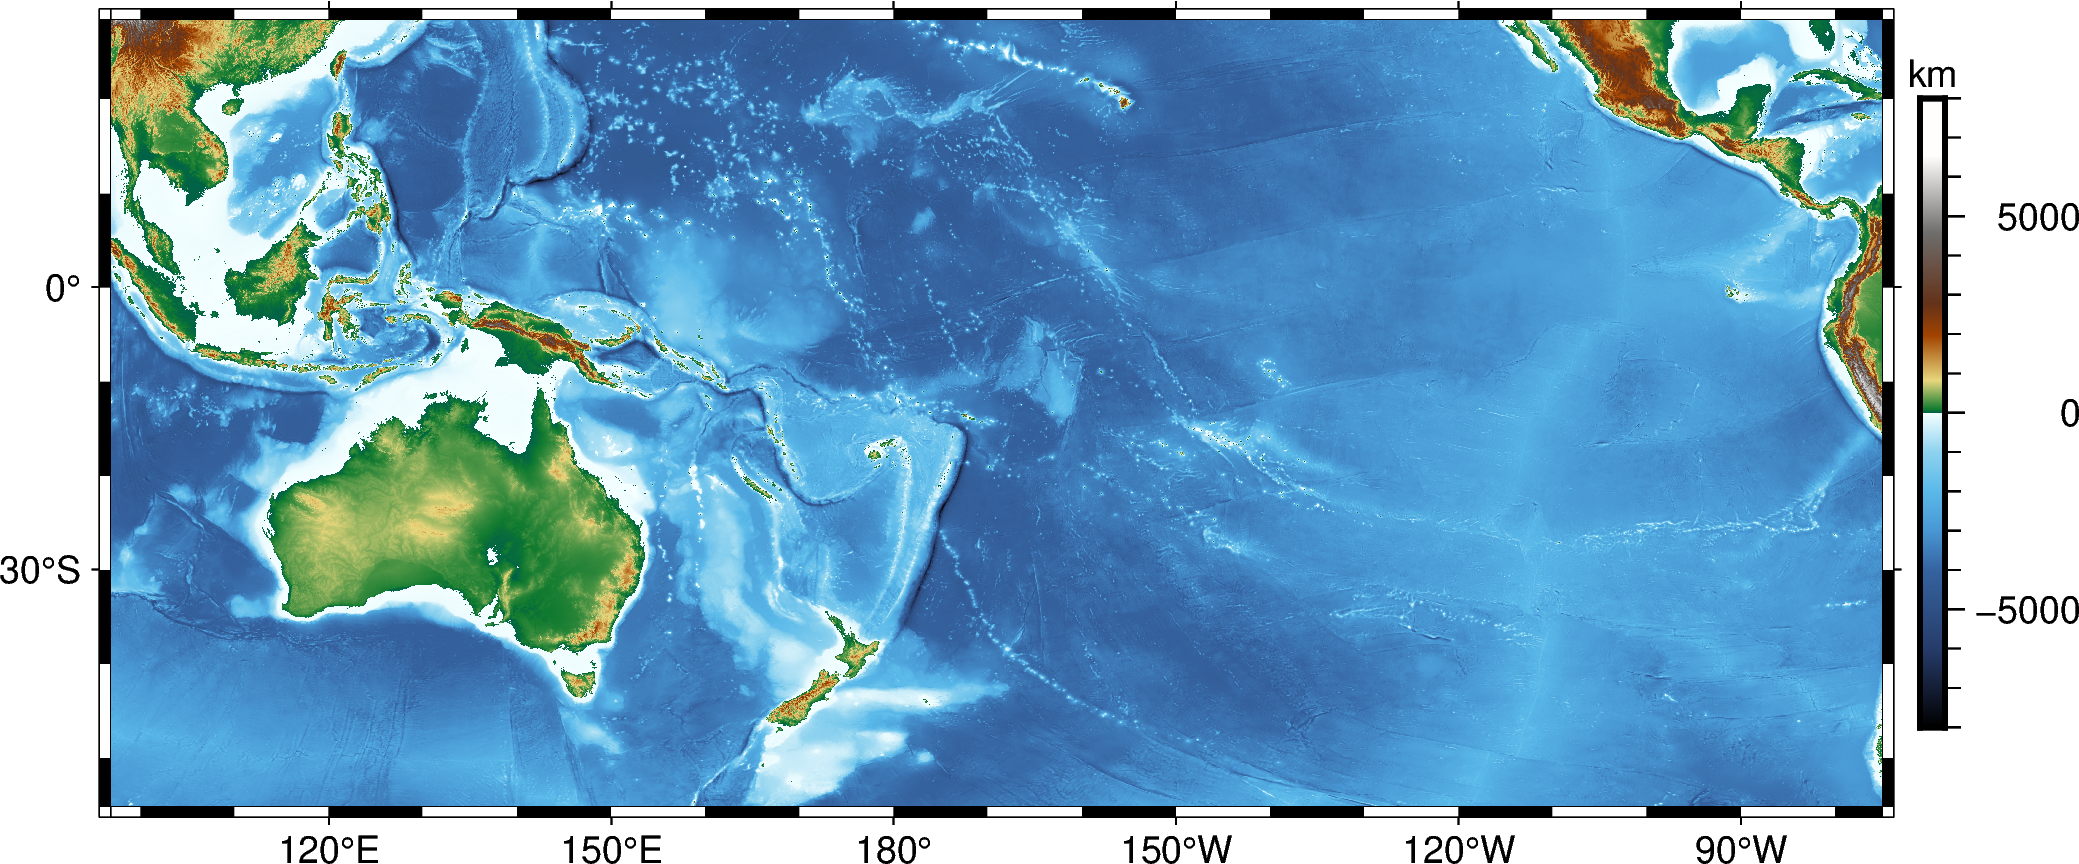

In [4]:
fig.show()

In [5]:
# example 2
import numpy as np 
np.random.seed(0)
minlon, maxlon = 60, 95
minlat, maxlat = 0, 25

## Generate fake coordinates in the range for plotting
lons = minlon + np.random.rand(10)*(maxlon-minlon)
lats = minlat + np.random.rand(10)*(maxlat-minlat)

In [6]:
fig1 = gmt.Figure()

In [7]:
topo_data = '@earth_relief_30s' #30 arc second global relief (SRTM15+V2.1 @ 1.0 km)


In [8]:
# make color pallets
gmt.makecpt(
    cmap='topo',
    series='-8000/8000/1000',
    continuous=True
)

In [9]:
#plot high res topography
fig1.grdimage(
    grid=topo_data,
    region=[minlon, maxlon, minlat, maxlat], 
    projection='M4i',
    shading=True,
    frame=True
    )

In [10]:
# plot coastlines
fig1.coast(
    region=[minlon, maxlon, minlat, maxlat], 
    projection='M4i', 
    shorelines=True,
    frame=True
    )

In [11]:
# plot topo contour lines
fig1.grdcontour(
    grid=topo_data,
    interval=4000,
    annotation="4000+f6p",
    # annotation="1000+f6p",
    limit="-8000/0",
    pen="a0.15p"
    )

In [12]:
# plot data points
fig1.plot(
    x=lons,
    y=lats, 
    style='c0.1i', 
    color='red', 
    pen='black', 
    label='something',
    )

In [13]:
# Default is horizontal colorbar
fig1.colorbar(
    frame='+l"Topography"'
    )

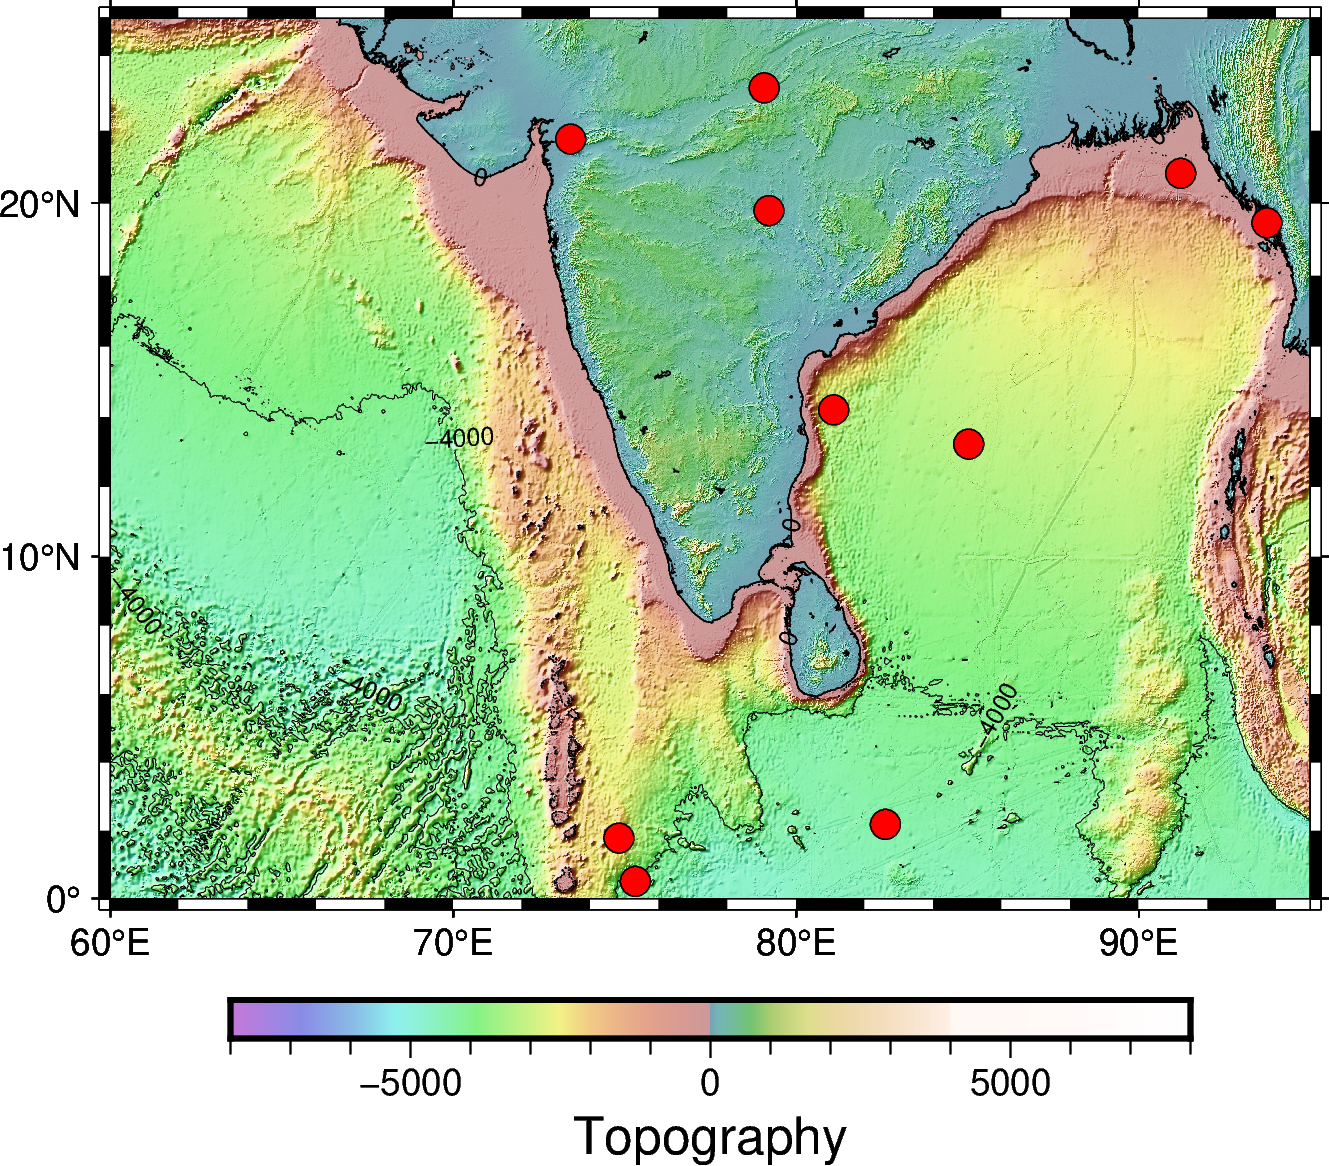

In [14]:
fig1.show()